# LAb4: Modelos polinomiais

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Tomás Gomes
## Número: 48614

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab4.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

# Pergunta 1 - Discriminantes polinomiais:
### Considere o ficheiro pickle $\texttt{Lab4-T51D-P1.p}$ onde se encontra um dicionário de Python com as seguintes variáveis:
* #### "data":       dados bi-dimensionais (4000 amostras)
* #### "target":     classe dos dados (inteiros de 0 a 3)
* #### "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
* #### "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores
## a) Use os dados de treino para estimar discriminante polinomial de 4ª ordem.
## b) Calcule as matrizes de confusão e o número total de erros nos dados de treino e de teste. Imprima os resultados.
## c) Faça um "plot" dos dados de teste por classe, e dos erros do discriminante polinomial.
## d) Explique brevemente porque é que mais de metade dos pontos da classe "1" não são bem classificados 

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
D=pickle.load(open('Lab4-T51D-P1.p','rb'))
print(D.keys())

dict_keys(['data', 'target', 'foldTrain', 'foldTest'])


## 1.a)

In [42]:
X = D['data']
y = D['target']
f1 = D['foldTrain']
f2 = D['foldTest']
X1 = X[:, f1]
X2 = X[:, f2]
y1 = y[f1]
y2 = y[f2]

Y1 = -np.ones((4, 400))

for i in range(4):
    Y1[i, y1==i] = 1
    
poly = PolynomialFeatures(degree=4).fit(X1.T)

X1b = poly.transform(X1.T).T
X2b = poly.transform(X2.T).T

Rx = np.dot(X1b, X1b.T)
rxy = np.dot(X1b, Y1.T)
W = np.dot(np.linalg.pinv(Rx), rxy)

## 1.b)

In [43]:
y1e = np.argmax(np.dot(W.T,X1b), axis=0)
print('Erros no treino:', np.sum(y1!=y1e), '(' + str((np.sum(y1!=y1e)/y1.shape[0]*100)) + '%)')
print(confusion_matrix(y1,y1e)) 
print()

y2e = np.argmax(np.dot(W.T,X2b), axis=0)
print('Erros no teste:', np.sum(y2!=y2e), '(' + str((np.round(np.sum((y2!=y2e)/y2.shape[0]*100), decimals = 2))) + '%)')
print(confusion_matrix(y2, y2e))

Erros no treino: 42 (10.5%)
[[ 62  15   0  23]
 [  0  96   4   0]
 [  0   0 100   0]
 [  0   0   0 100]]

Erros no teste: 845 (23.47%)
[[583 130   0 187]
 [400 372 128   0]
 [  0   0 900   0]
 [  0   0   0 900]]


## 1.c)

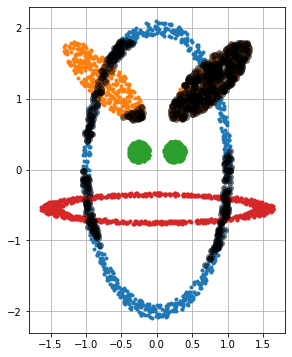

In [44]:
plt.figure(figsize=(18,6))
plt.plot(X2[0, y2==0], X2[1, y2==0], '.')
plt.plot(X2[0, y2==1], X2[1, y2==1], '.')
plt.plot(X2[0, y2==2], X2[1, y2==2], '.')
plt.plot(X2[0, y2==3], X2[1, y2==3], '.')
plt.plot(X2[0, y2!=y2e], X2[1, y2!=y2e], 'ok', alpha=.4)
plt.axis('scaled')
plt.grid(True)

## 1.d)

Text(0.5, 1.0, 'Dados de Teste com erros')

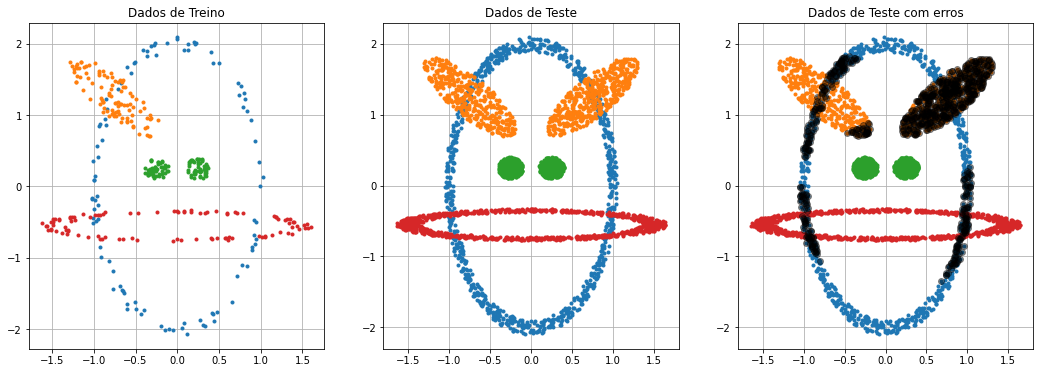

In [45]:
plt.figure(figsize=(18,6))
#plot dados de treino
plt.subplot(131)
plt.grid()
plt.plot(X1[0, y1==0], X1[1, y1==0], '.')
plt.plot(X1[0, y1==1], X1[1, y1==1], '.')
plt.plot(X1[0, y1==2], X1[1, y1==2], '.')
plt.plot(X1[0, y1==3], X1[1, y1==3], '.')
plt.title('Dados de Treino')

#plot dados de teste
plt.subplot(132)
plt.grid()
plt.plot(X2[0, y2==0], X2[1, y2==0], '.')
plt.plot(X2[0, y2==1], X2[1, y2==1], '.')
plt.plot(X2[0, y2==2], X2[1, y2==2], '.')
plt.plot(X2[0, y2==3], X2[1, y2==3], '.')
plt.title('Dados de Teste')

#plot dados de teste com erros
plt.subplot(133)
plt.grid()
plt.plot(X2[0, y2==0], X2[1, y2==0],'.')
plt.plot(X2[0, y2==1], X2[1, y2==1],'.')
plt.plot(X2[0, y2==2], X2[1, y2==2],'.')
plt.plot(X2[0, y2==3], X2[1, y2==3],'.')
plt.plot(X2[0, y2!=y2e], X2[1, y2!=y2e], 'ok', alpha=.4)
plt.title('Dados de Teste com erros')


## Como podemos observar nos plots acima, nos dados de treino, a "nuvem" de dados do lado direito não existe, assim quando usarmos o modelo de classificação treinado com os dados de treino nos dados de teste, é normal que a nuvem da direita de pontos da classe 1 não esteja bem classificada pois estes nao existiram para criar o modelo de classificação.
 

<hr style="border:2px solid black"> </hr>

# Pergunta 2 - Regressão polinomial:
### Considere o ficheiro pickle $\texttt{Lab4-T51D-P2.p}$ onde se encontra um dicionário de Python com as seguintes variáveis:
* #### "x":       dados uni-dimensionais/variável independente (500 pontos)
* #### "y":       variável dependente/saídas desejadas (500 pontos)
* #### "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
* #### "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores

## a) Use os dados de treino para estimar um regressor polinomial de 5ª ordem. Imprima os valores dos pesos.
## b) Calcule o coeficiente de determinação ($\bf R^2$) para os dados de treino e para os dados de teste.
## c) Faça um "plot" do polinómio estimado. Visualize o polinómio conjutamente com os dados de teste. 
## d)  Explique brevemente porque é que o modelo não está bem adaptado aos dados de teste.

In [46]:
D=pickle.load(open('Lab4-T51D-P2.p','rb'))
D.keys()

dict_keys(['x', 'y', 'foldTrain', 'foldTest'])

## 2.a)

In [47]:
#divisao dos dados
x = D.x
y = D.y
f1 = D.foldTrain
f2 = D.foldTest
x1 = x[f1]
y1 = y[f1]
x2 = x[f2]
y2 = y[f2]

#adicionar dimensao
X1 = x1[:, np.newaxis]
X2 = x2[:, np.newaxis]

#criar e treinar regressor polinomial de grau 5
poly = PolynomialFeatures(degree=5).fit(X1)

#testar dados no regressor
X1b = poly.transform(X1).T
X2b = poly.transform(X2).T

#formula de cáculo do vetor de pesos
Rx = np.dot(X1b, X1b.T)
rxy = np.dot(X1b, y1.T)
W = np.dot(np.linalg.pinv(Rx), rxy)
print('Calculado "à mão": ')
print('W[0]: ', W[0])
print('W: ', W)

#mesmo mas com funções do sklearn (dados de treino) 
lr = LinearRegression().fit(X1b.T,y1)
print('\nCalculado com funcao do sklearn: ')
print('W[0]: ', lr.intercept_)
print('W: ', lr.intercept_, lr.coef_[1:])

Calculado "à mão": 
W[0]:  3.0192067482413467
W:  [ 3.01920675  2.42982275  0.19422044 -0.29890342 -0.02875485  0.00515094]

Calculado com funcao do sklearn: 
W[0]:  3.0192067482375364
W:  3.0192067482375364 [ 2.42982275  0.19422044 -0.29890342 -0.02875485  0.00515094]


## 2.b)

In [48]:
#cálculo do y estimado a partir da formula
y1e = np.dot(W,X1b)
y2e = np.dot(W,X2b)

#R2 dados de treino
SQtot = np.mean((y1-np.mean(y1))**2)
SQres = np.mean((y1-y1e)**2)
R2_treino = 1-(SQres/SQtot)

#R2 dados de teste
SQtot = np.mean((y2-np.mean(y2))**2)
SQres = np.mean((y2-y2e)**2)
R2_teste = 1-(SQres/SQtot)

#à mao
print('Calculados "à mão": ')
print('R2 treino:', R2_treino)
print('R2 teste:', R2_teste)

#com sklearn
print('\nCalculados com funcao do sklearn: ')
print('R2 treino:', lr.score(X1b.T,y1))
print('R2 teste:', lr.score(X2b.T,y2))

Calculados "à mão": 
R2 treino: 0.9482429591179281
R2 teste: -20.21115035995002

Calculados com funcao do sklearn: 
R2 treino: 0.9482429591179281
R2 teste: -20.211150360113827


## 2.c)

Extremos da funcao: -4.984047523469415 4.9925533528796855


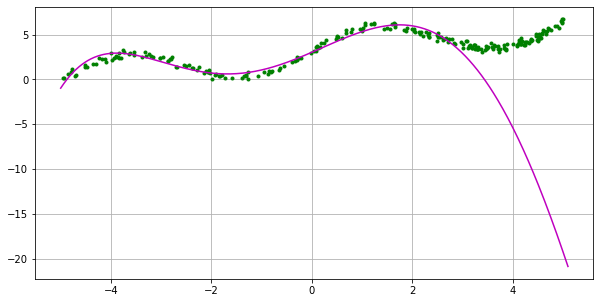

In [49]:
#pólos da funcao
print('Extremos da funcao:', x.min(),x.max())

#array de pontos com extremos relacionados com polos da funcao
t = np.linspace(-5, 5.1, 500)

T = poly.transform(t[:, np.newaxis]).T
yt = np.dot(W, T)
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(x2, y2, '.g')
plt.plot(t, yt, 'm')

## 2.d)

Text(0.5, 1.0, 'Dados de Teste')

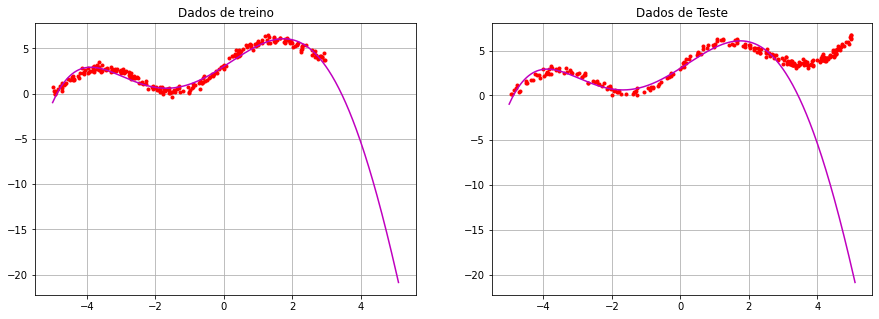

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.grid()
plt.plot(x1, y1, '.r')
plt.plot(t, yt, 'm')
plt.title('Dados de treino')

plt.subplot(122)
plt.grid()
plt.plot(x2, y2, '.r')
plt.plot(t, yt, 'm')
plt.title('Dados de Teste')

## Como o modelo foi treinado com os dados de treino e estes nao têm os pontos da direita como os dados de teste, o modelo vai classificar mal os dados de teste